# Working With Statistical Distributions

In [1]:
from scipy import stats
from scipy.stats import norm, binom

**scipy distribution object: What can we calculate from distribution?**
- value -> probability

    -- **pmf:** equal to a point (only for discrete distributions!)
    
    -- **pdf:** equal to a point (for continuous distributions)
    
    -- **cdf:** less than or equal to a point
    
    -- **sf:** greater than a point
    
- probability -> value

    -- **ppf:** less than or equal to a point
    
    -- **isf:** greater than a point
    
- rvs for random values (could also use numpy)

### PDF / PMF
Probability our random variable takes on a given value.
Probability Mass Function

- pdf : probability density function, for continuous distributions
- pmf : probability mass function, for discrete distributions

is inclusive

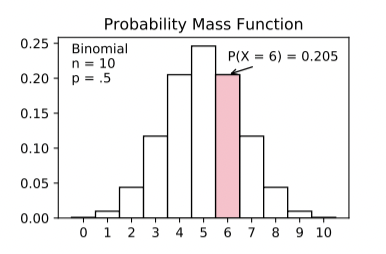

### CDF / PPF
Probability our random variable takes on a value less than or equal to
a given point.

- cdf : cumulative density function, given a value, what's the probability?

- ppf : percent point function, given a probability, what's the value?

is inclusive

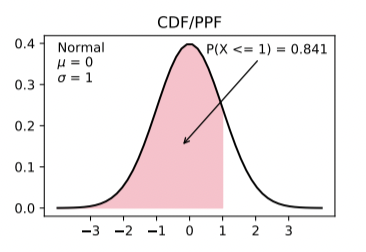

### SF & ISF
Probability our random variable takes on a value greater than a given
point.

- sf : survival function, given a value, what's the probability?
- isf : inverse survival function, given a probability, what's the value?

Is exclusive

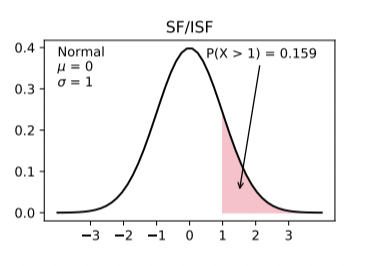

Scipy lets us specify parameters for the various distributions and
then use the functions outlined above1

1 These parameters can also be specied as keyword arguments when the function is invoked, but for the sake of
simplicity we will show this way.

A normal distribution with μ = 70, σ = 8
- my_normal_distribution = norm(70, 8)
    - What's the likelihook the value is over 80?
- my_normal_distribution.sf(80)
    - What value is the cuto point for the bottom 30%?
- my_normal_distribution.ppf(.3)

A binomial distribution with n = 10, p = .3
- my_binomial_distribution = binom(10, .3)
     - What's the likelihood of 5 or less successes?
- my_binomial_distribution.cdf(5)
    - What's the probability of exactly 4 successes?
- my_binomial_distribution.pmf(4)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


Probabiity Distributions: Mathematical functions that we can use to model real-world processes.

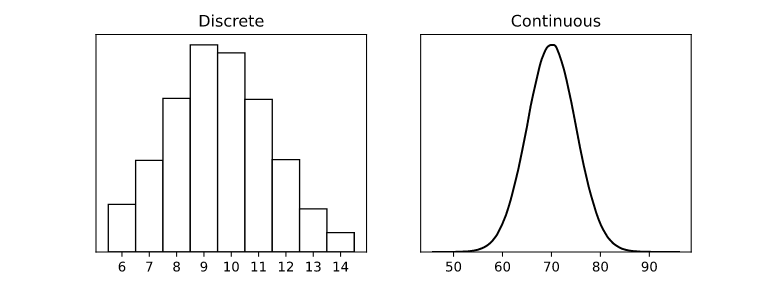


Discrete distribution:

- Number of customer complaints
- Number of calls received in a call-center per hour
- Number of food trucks at Travis Park in a day

Continuous distribution:

- Height
- Temperature
- Employee salaries


## Types of Distributions:
- Normal distribution
- Binomial distribution
- Poisson distrbution

More Probability distributions: https://en.wikipedia.org/wiki/List_of_probability_distributions

## Lesson Objectives:
- Understand and recognize these distributions
- Understand parameters we need to generate these distribution
- Given a distribution, calculate probabilities for certain value of the random variable


## Normal Distribution
- Bell shaped
- Most observations are closer to the mean
- Common in nature. Examples
    - Height
    - time a flight takes from point A to B
    - manufacturing
- 2 parameters
    - mean ($\mu$)
    - std dev ($\sigma$)

**Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars.**
- What is the probability that sales are 10,000 dollars on a certain day.
- What is the probability that sales are 10,000 dollars or less on a certain day.
- What is the probability that sales are greater than 15,000 dollars on a certain day.
- How much would the daily sales have to be to be in the top 10% of all days?

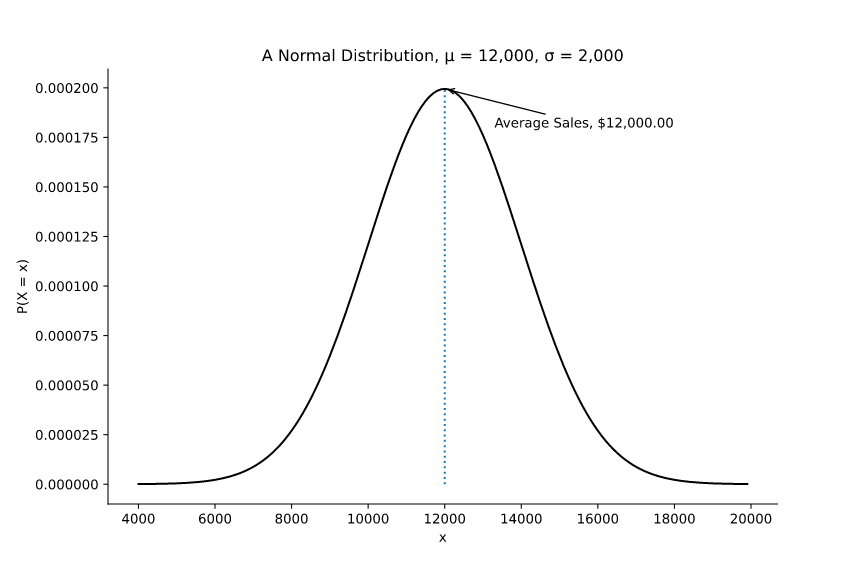

**What is the probability that sales are 10,000 dollars on a certain day?** using above graph

In [16]:
mean = 12_000
std = 2_000

#Step 1: use scripy stats module to generate our distribution
sales = stats.norm(mean, std) #now has all the perameters it needs

sales.pdf(10_000)

0.00012098536225957169

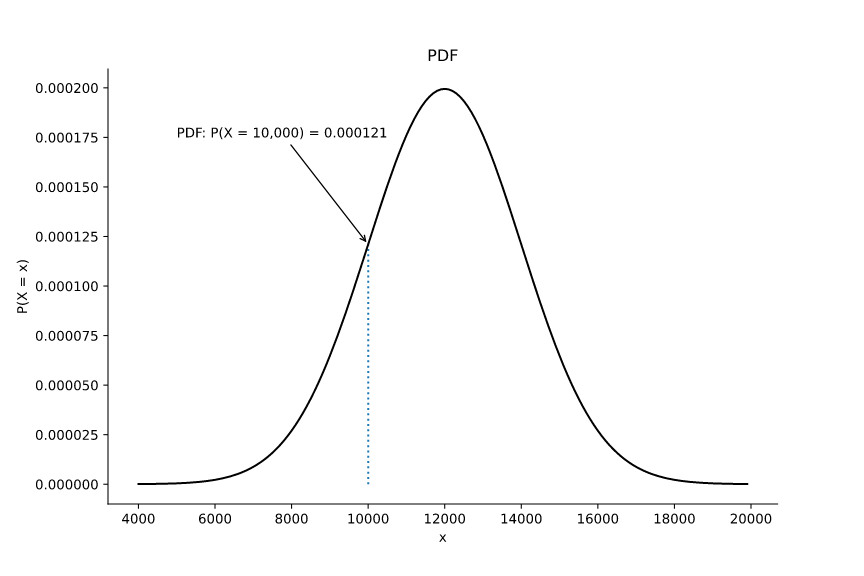

**scipy distribution object: What can we calculate from distribution?**
- value -> probability

    -- **pmf:** equal to a point (only for discrete distributions!)
    
    -- **pdf:** equal to a point (for continuous distributions)
    
    -- **cdf:** less than or equal to a point
    
    -- **sf:** greater than a point
    
- probability -> value

    -- **ppf:** less than or equal to a point
    
    -- **isf:** greater than a point
    
- rvs for random values (could also use numpy)

**What is the probability that sales are 10,000 dollars or less on a certain day.**

In [17]:
# Use cdf to find probability for any given X or less.
sales.cdf(10_000)

0.15865525393145707

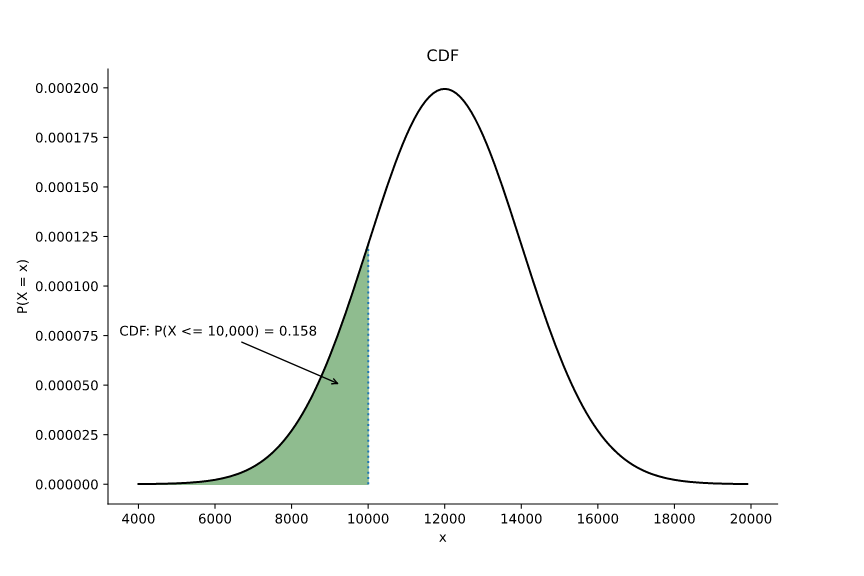

**What is the probability that sales are greater than 15,000 dollars on a certain day?**

In [18]:
# use sf to find probability for any given X or more.
sales.sf(15_000)

0.06680720126885807

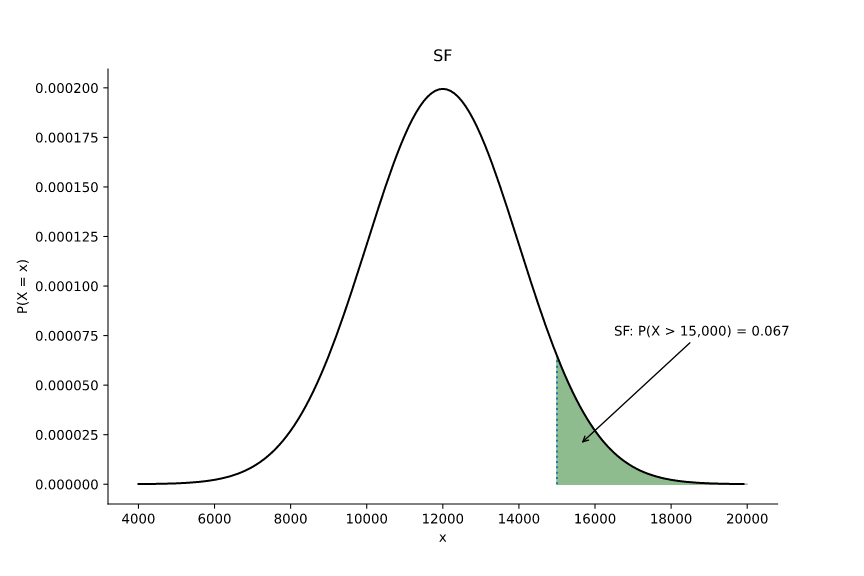

**How much would the daily sales have to be to be in the top 10% of all days?**

In [19]:
# Given a probability what is the value of X?
sales.isf(.1)

14563.103131089201

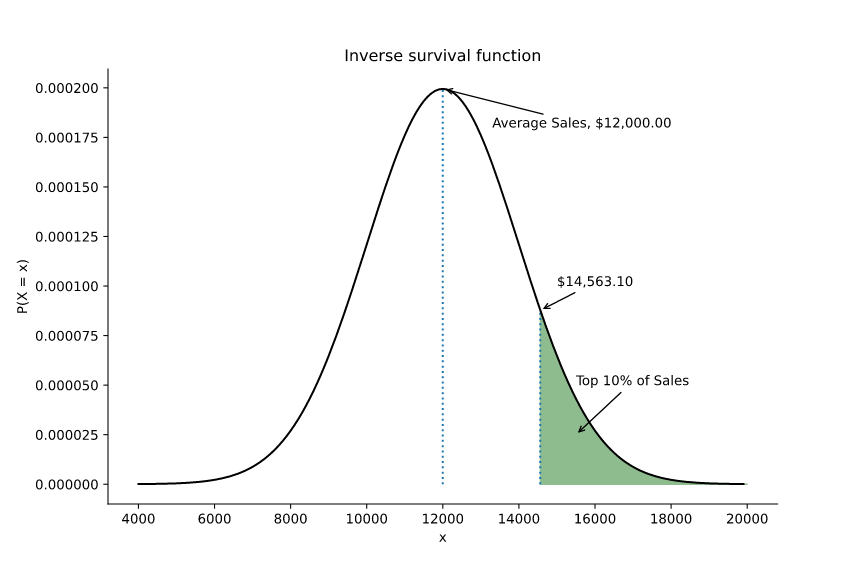

**Manufacturing tolerances example:**

**Apple machines the front glass of iphone to mean thickness of 500 $\mu$m. Upon inspecting a sample of 1000 phone off assembly line, the standard deviation of the thickness was measured as 25 $\mu$m.**

**Apple spec sheet list the max and min tolerances on glass thickness and +/- 50 $\mu$m. Meaning anything iphone built with glass thickness greater than 550 $\mu$m or less than 450 $\mu$m is considered defective.**

1. If the assembly line produced 1000,000 iphone last year, how many iphone were built as 'defective'.
2. If the standard deviation of thickness increased to 33 $\mu$m due to manufacuring issue at the assembly plant, how many defective iphones were built?
3. Apple was able to implement new improved machining process and reduce the std dev to 14 $\mu$m. How many defective iphone will be built?

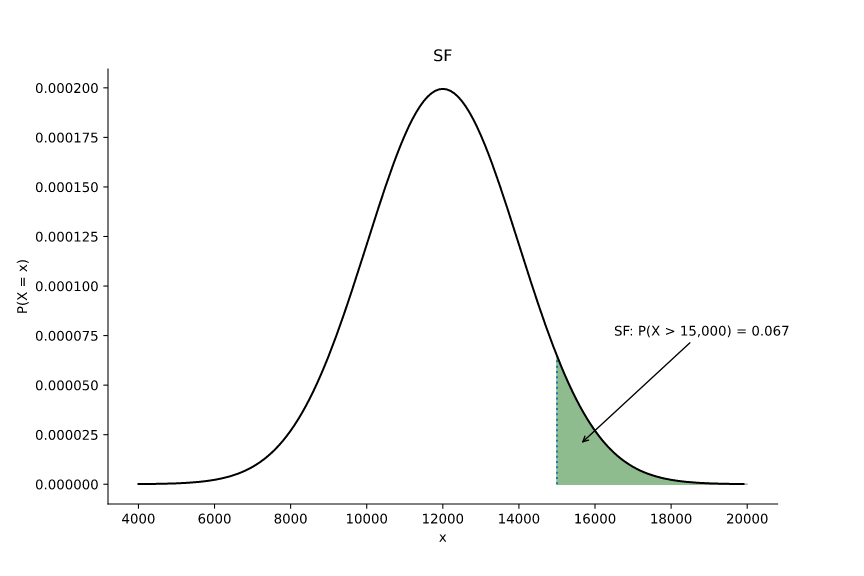

https://www.biz-pi.com/real-life-sigma-level-examples/

Answer question 1 "If the assembly line produced 1000,000 iphone last year, how many iphone were built as 'defective'."

In [20]:
phones = stats.norm(500,25)
phones

In [23]:
(1 - (phones.cdf(550) - phones.cdf(450))) * 1_000_000

45500.26389635842

Answer question 2 "If the standard deviation of thickness increased to 33  𝜇 m due to manufacuring issue at the assembly plant, how many defective iphones were built?"

In [25]:
phones = stats.norm(500, 33)

In [26]:
(1 - (phones.cdf(550) - phones.cdf(450))) * 1_000_000

129734.03829466879

Answer question 3 "Apple was able to implement new improved machining process and reduce the std dev to 14  𝜇 m. How many defective iphone will be built?"

In [27]:
phones = stats.norm(500, 14)

In [28]:
(1 - (phones.cdf(550) - phones.cdf(450))) * 1_000_000

355.0393807469909

**Summary: Scipy provides many different ways of interacting with various statistical distributions through it's stats module.**
- pmf / pdf
- cdf / ppf
- sf / isf

### Binomial Distribution
Binomial distribution is a discrete probability distribution.

Defined by

- Number of Trials
- Probability of 'success' in each trial


### Assumptions:
- Two potential outcome per trial
- Probability of success is same across all trials
- Each trial is independent


**Example: Suppose we flip a fair coin 5 times in a row. What is probability of getting exactly 1 head.**

**Random variable X = Number of heads from flipping a coin 5 times**

Step 1: What is a trial.

- Each flip of coin is a trial
- number of trials = 5

Step 2: Define what is 'success'.

- Getting 'heads' in a coin toss
- probability of success (getting 'heads') = 0.5

Total possible outcomes for 5 coin flips = 2 2 2 2 2 = 32

**For P(X = 0) i.e zero heads in 5 trials**
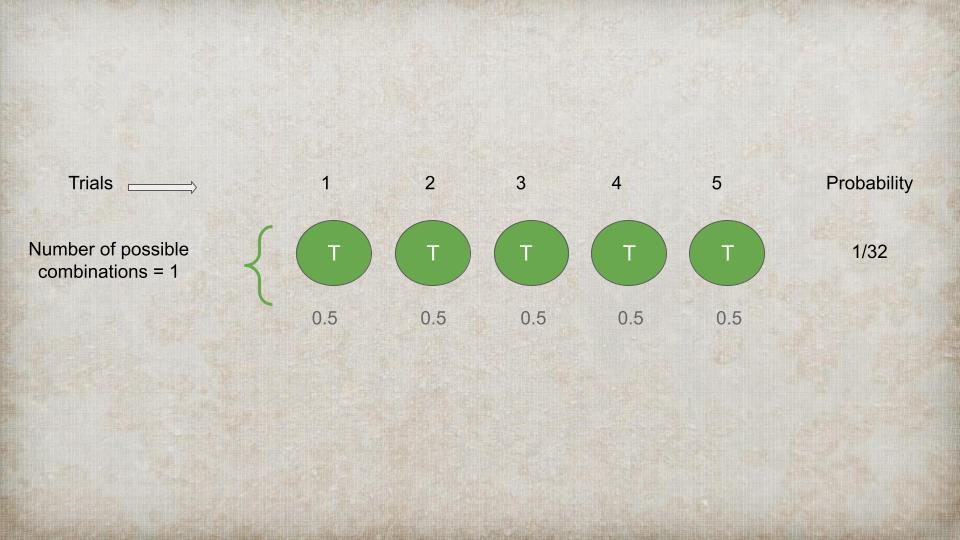

Probability(X = 0) = 1/32

- Probability (X = 1) i.e 1 head in 5 trials

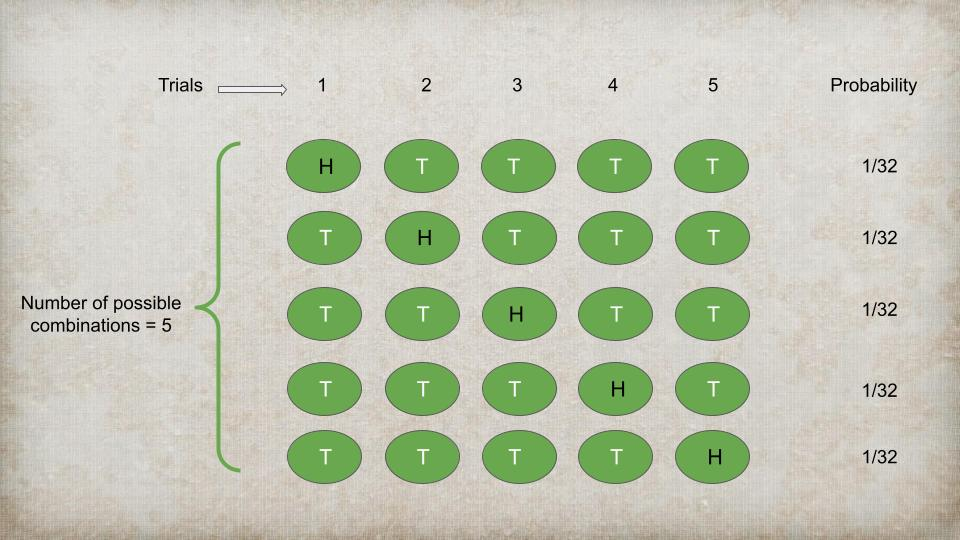

Probability(X = 1) = 5 * 1/32

In [31]:
# Binomial Parameters:

n_trials = 5
prob = 0.5

# Use Stats module to calculate probabilities
stats.binom(n_trials, prob).pmf(0)

0.03125

In [32]:
stats.binom(n_trials, prob).pmf(1)

0.15624999999999994

In [33]:
stats.binom(n_trials, prob).pmf(2)

0.3125

In [35]:
stats.binom(n_trials, prob).pmf(3)

0.3125

In [36]:
stats.binom(n_trials, prob).pmf(4)

0.15624999999999994

In [34]:
stats.binom(n_trials, prob).pmf(5)

0.03125

**Discrete variables will always be PDF**

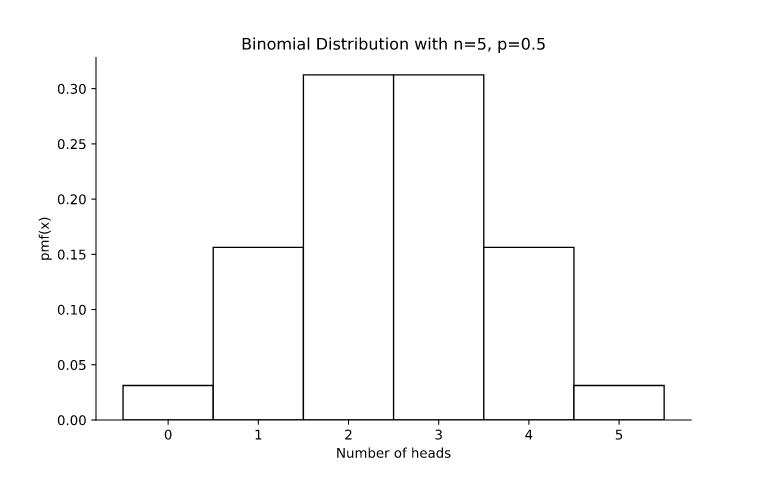


Rigged coin distribution
- Probability of success (getting 'heads' in a coin toss) = 0.7
- number of trials = 5

In [38]:
stats.binom(n_trials, 0.7).pmf(5)
#now dristribution has been shifted to the right

0.16806999999999994

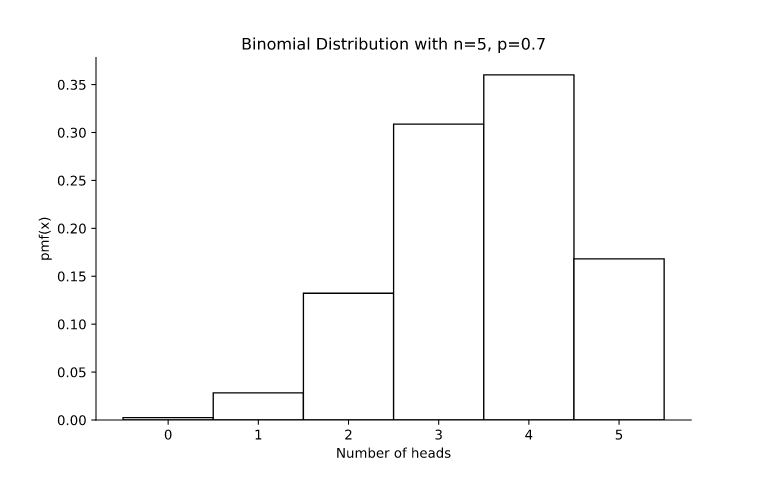

***Rigged coin distribution**

Probability of success (getting heads in a coin toss) = 0.2

Number of trials = 5

In [40]:
stats.binom(n_trials, 0.3).pmf(5)
#now dristribution has been shifted to the left

0.002429999999999999


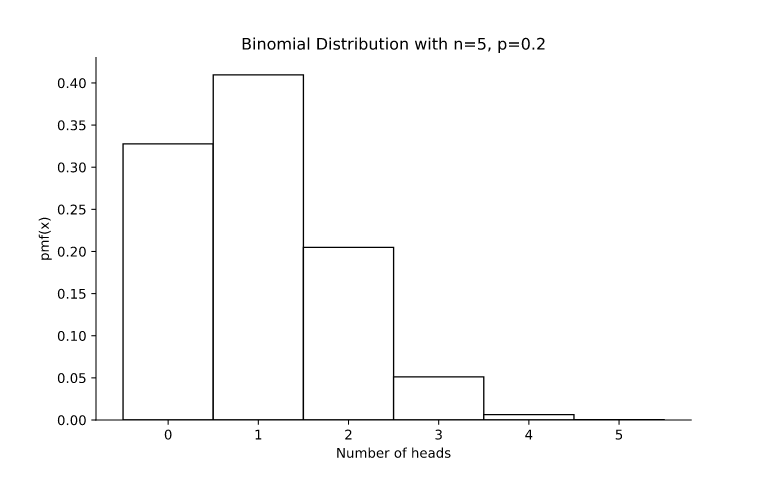


**Example 1:**

You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

In [41]:
# What kind of distribution is this?

n_trials = 30
#success = correct answers
p = 0.25 # because each q has 4 choices

# Random variable X: Number of questions answered correctly

stats.binom(n_trials, p).sf(10)

0.10572812269266013

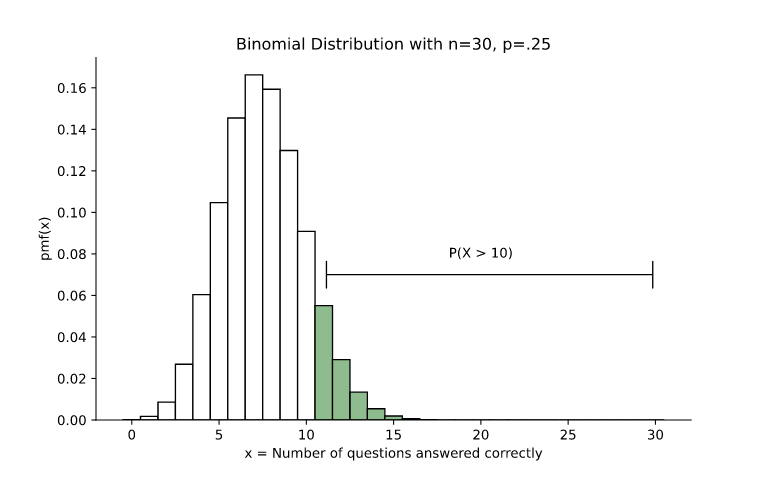

**Example 2:**
Suppose there is a 5% chance that a Codeup student will show up late to class. With a class of 20, what is the likelihood that everyone shows up on time?

success = ?

In [42]:
# What kind of distribution is this?

n = 20
p = 0.05

stats.binom(n, p).cdf(0)
# Random variable X:?

0.3584859224085419

In [44]:
#pmf could also work
stats.binom(n, p).pmf(0)

0.3584859224085422

In [46]:
#sf could also work
1 - stats.binom(n, p).sf(0)

0.35848592240854193

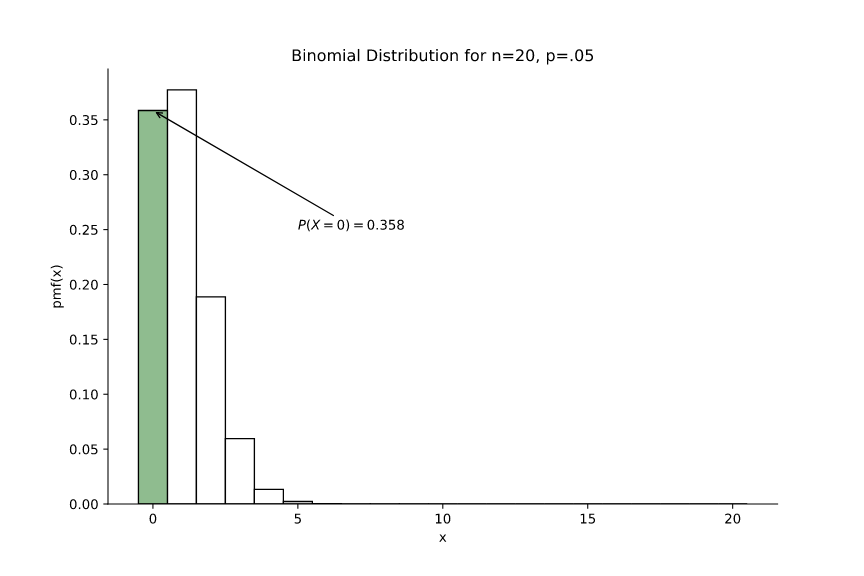

## Poisson Distribution
- discrete probability distribution
- expresses the probability of a given number of events occurring in a fixed interval of time or space
- No upper bound on number of events (un-like Binomial distribution)
- Only one parameter ($\lambda$,) which is the rate at which the event happens.
- binomial is set poisson is infinate

### Real life examples:

**Telecommunications**: # of calls arriving in to customer service.

**Astronomy**: photons arriving at a telescope.

**Biology**: the number of mutations on a strand of DNA per unit length.

**Management**: customers arriving at a counter or call centre.

**Finance and insurance**: number of losses or claims occurring in a given period of time.

**Radioactivity**: number of decays in a given time interval in a radioactive sample.

**Example**

Suppose that astronomers estimate that large meteorites (above a certain size) hit the earth on average once every 100 years (λ = 1 event per 100 years), and that the number of meteorite hits follows a Poisson distribution.

What is the probability of k = 0 meteorite hits in the next 100 years?

In [50]:
# What kind of distribution is this?

λ = 1 # \lambda then hit tab to get the λ symbol 

stats.poisson(λ).pmf(0)
# Random variable X:

0.36787944117144233

Text(0.5, 0, 'Number of meteorite strikes per 100 years')

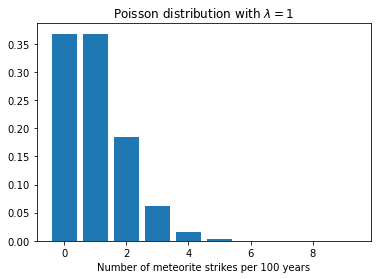

In [54]:
x = np.arange(0, 10)
y = stats.poisson(λ).pmf(x)

plt.bar(x, y)
plt.title('Poisson distribution with $\lambda = 1$')
plt.xlabel('Number of meteorite strikes per 100 years')

**Average number of customers going through CVS drive-through is 8 per hour. What is probability of that 11 cars customers will go through in next hr.**

In [55]:
# What kind of distribution is this?

λ = 8

# Random variable X:? number of cars per hour

stats.poisson(λ).pmf(11)

0.07219020642293475

Text(0.5, 0, 'Number of cars per hour')

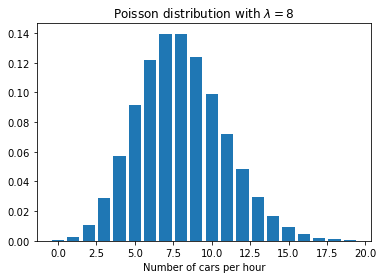

In [56]:
# Visualize the distribution

x = np.arange(0, 20)
y = stats.poisson(λ).pmf(x)

plt.bar(x, y)
plt.title('Poisson distribution with $\lambda = 8$')
plt.xlabel('Number of cars per hour')

## Summary:
Types of Distribution:

1. Normal distribution
    - mean($\mu$)
    - std dev ($\sigma$)
    - stats.norm($\mu$, $\sigma$ )
2. Binomial distribution
    - number of trials (n)
    - probability of success (p)
    - stats.binom(n, p )
    - X = number of success in trials
3. Poisson distribution
    - rate ($\lambda$)
    - stats.poisson($\lambda$)
    - X = number of events per unit time
    
    
For a defined probability distribution above, we can answer different questions using following functions:

- pmf/pdf
- cdf/ppf
- sf/isf

## Bonus Material

### Relationship between Binomial, Normal and Poisson Distribution



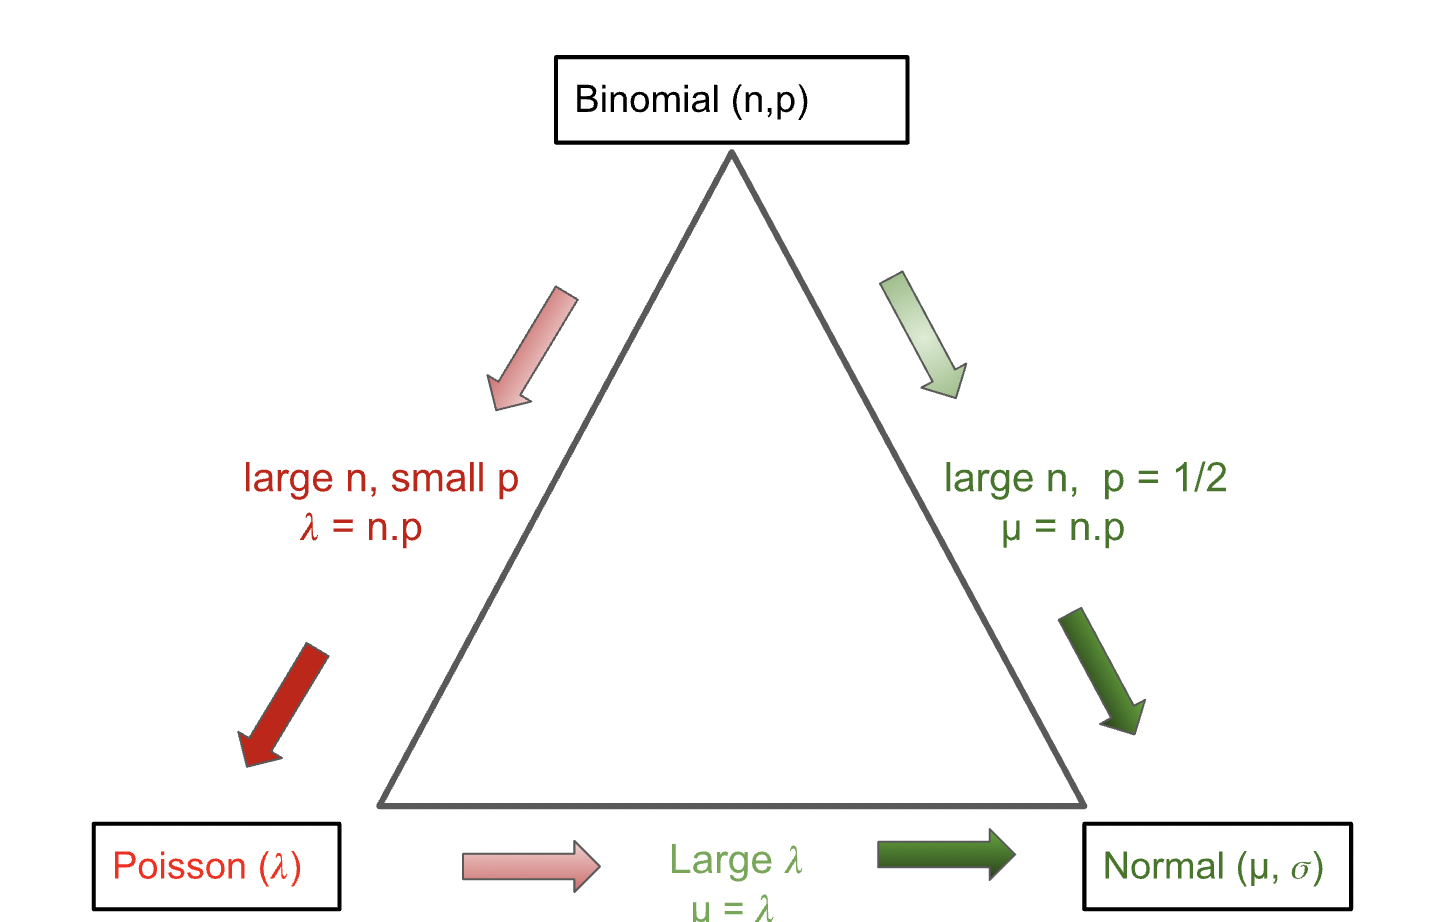

**scipy distribution object: What can we calculate from distribution?**
- value -> probability

    -- **pmf:** equal to a point (only for discrete distributions!)
    
    -- **pdf:** equal to a point (for continuous distributions)
    
    -- **cdf:** less than or equal to a point
    
    -- **sf:** greater than a point
    
- probability -> value

    -- **ppf:** less than or equal to a point
    
    -- **isf:** greater than a point
    
- rvs for random values (could also use numpy)